# Problem Set 1 - Airborne Fraction

## ATMS/ESS/OCEAN 588

Abigail L.S. Swann

In this problem set we will plot the emissions of fossil fuel over time, as well as calcuate how much of that CO2 remains airborne in the atmosphere

This code  
A. Loads and plots fossil fuel emission data  
B. Loads and plots Atmospheric CO2 concentration data for Mauna Loa Observatory  
C. Compares atmospheric growth rate to FF emission rate  
D. Calculates the Airborne Fraction of FF emitted CO2  
E. Does some additional calculations

#### Load Python Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

#### Location of the data files

In [2]:
# location of data
datapath = '~/PS1_AirborneFraction/'

https://globalcarbonbudgetdata.org/latest-data.html## A. Fossil Fuel Emissions
Fossil fuel emissions data that comes from the global carbon project. This is the most up to date dataset that I'm able to find.

The page that describes the data is here: https://globalcarbonbudgetdata.org/latest-data.html

The data contains emissions for all countries, and we will use the "global" values at the bottom of the file. 

Units are in Million Metric Tons of Carbon, which we will need to convert to PgC


In [11]:
# attempt to load the global carbon project version of the data instead of the CDIAC TRENDS

dfEmissions = pd.read_excel(datapath+ 'National_Fossil_Carbon_Emissions_2023v1.0.xlsx', sheet_name=1, skiprows=11)#, encoding='latin-1')

Extract data from the data structure

The data structre reads the header rows which we skipped. The first column (index zero) is year, and the other columns are emissions from individual countries. We will extract "Year" and "World" for emissions. 

You can also explore consumption emissions and transfered emissions in this dataset, or look at specific countries.


In [46]:
# Select only the column for World values (rather than a country) 
# You could modify this to find individual countries instead

dfGlobal = dfEmissions.World 

# find the columns conatining data we want to look at 
year_FF = dfEmissions.iloc[:,0].values # we have to use an index for the year column because it does not have a name in the right spot in the excel sheet
FFtotal_mtC= dfEmissions.World.values # we can use the name for the World emissions column (much easier!)

convert units of FF flux from million metric tons C to Peta-grams C

million metric ton = 1e6 * 1e6 g/ton = 1e12 g CO2   
**This is the conversion factor we will use.**

IF the units were in CO2 we would need to also convert from CO2 to C (they used to report it in CO2, so always be on the lookout!)
gC = 12g/mole , gCO2 = 12+16+16 = 44 g/mole

1gCO2* 12gC/44gCO2

In [47]:
# convert million tons of CO2 to PgC
FFtotal_PG = FFtotal_mtC*1e12/1e15

Plot Global Mean Fossil Fuel Emissions over time

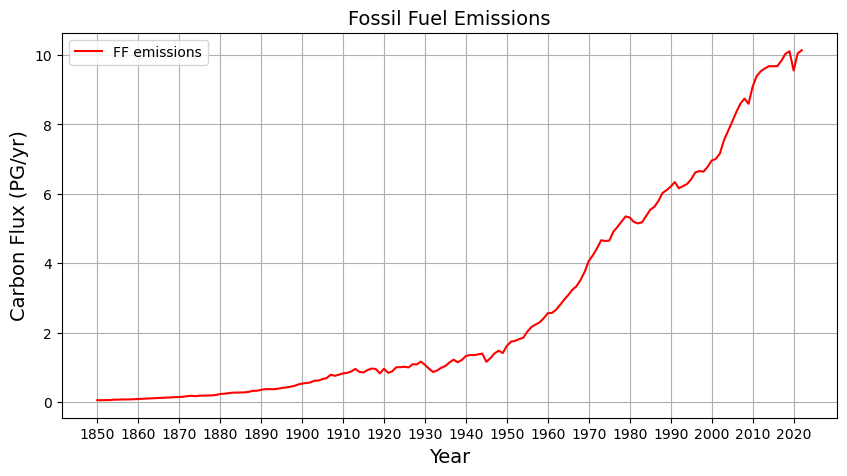

done saving file


In [48]:
fig = plt.figure(figsize=(10,5))
ax=plt.axes()

# plot a zonal mean on an existing figure axis
ax.plot(year_FF, FFtotal_PG, color='r',label='FF emissions')

ax.set_xticks(np.arange(1850,2030,10)) # puts grid lines every 10 years
ax.legend()
plt.grid()

# set a title
plt.title('Fossil Fuel Emissions',fontsize=14,y=1)

# add axis labels
plt.ylabel('Carbon Flux (PG/yr)',fontsize=14)
plt.xlabel('Year',fontsize=14)

# show the plot:
plt.show()

# save the plot
fig.savefig('FFtotal.png', bbox_inches='tight')
print('done saving file')

# close the plot (so python stops trying to hold on to it in memory; you can
# still look at it at this point, but you're done editing)
plt.close()

## B. Atmospheric CO2 concentration
 Atmospheric CO2 concentration can be estimated from the observational 
 record at Mauna Loa Observatory (MLO) which has been collected since 1959
 
 The data is available here: 
 https://gml.noaa.gov/ccgg/trends/data.html
 
 We will look at the annual mean data for this exercise which are found here:
 https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.txt
 
 units are in mole fraction in dry air, micromol/mol, also called 
 parts per million - or ppm

In [49]:
# Load data file (don't worry about the error message about regex)
df = pd.read_csv(datapath+ 'co2_annmean_mlo.txt', sep=r'\s{1,}', skiprows=56, engine='python')
datastruct = df.values

---- Extract data from the data structure----

 This data set has 3 columns, we will use the first two (python indexes from zero)

In [50]:
year_MLO = datastruct[:,0]
MLO_annmean = datastruct[:,1]

Plot Atmospheric CO2 measured at Mauna Loa Observatory

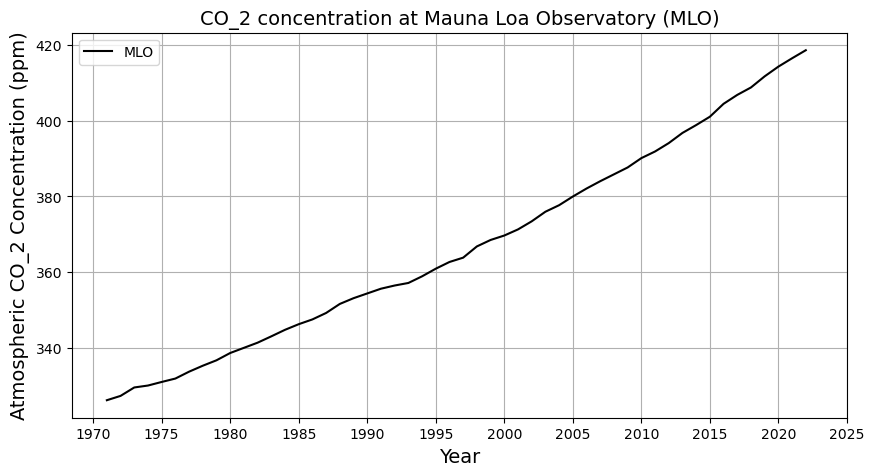

done saving file


In [53]:
fig = plt.figure(figsize=(10,5))
ax=plt.axes()

# plot a zonal mean on an existing figure axis
ax.plot(year_MLO, MLO_annmean, color='k',label='MLO')

ax.set_xticks(np.arange(1970,2030,5)) # puts grid lines every 5 years
ax.legend()
plt.grid()

# set a title
plt.title('CO_2 concentration at Mauna Loa Observatory (MLO)',fontsize=14,y=1)

# add axis labels
plt.ylabel('Atmospheric CO_2 Concentration (ppm)',fontsize=14)
plt.xlabel('Year',fontsize=14)

# show the plot:
plt.show()

# save the plot
fig.savefig('MLO.png', bbox_inches='tight')
print('done saving file')

# close the plot (so python stops trying to hold on to it in memory; you can
# still look at it at this point, but you're done editing)
plt.close()

## C. Compare CO2 concentrations and CO2 emissions from fossil fuels

need to convert the units of PG carbon emission to ppm

2PG C = 1ppm in the atmosphere

In [54]:
PG2ppm=1/2
FFtotal_ppm  = FFtotal_PG*PG2ppm

need to calculate the growth rate of CO2 at MLO

Growth rate is just the amount of change from one year to the next. For example, the growth rate in the year 2000 is the difference between the concentration in 1999 and the concentration in 2000.

In [55]:
MLO_growth = np.diff(MLO_annmean)
year_MLOgrowth = year_MLO[1:]

--- Plot CO2 growth and FF emissions in the same units

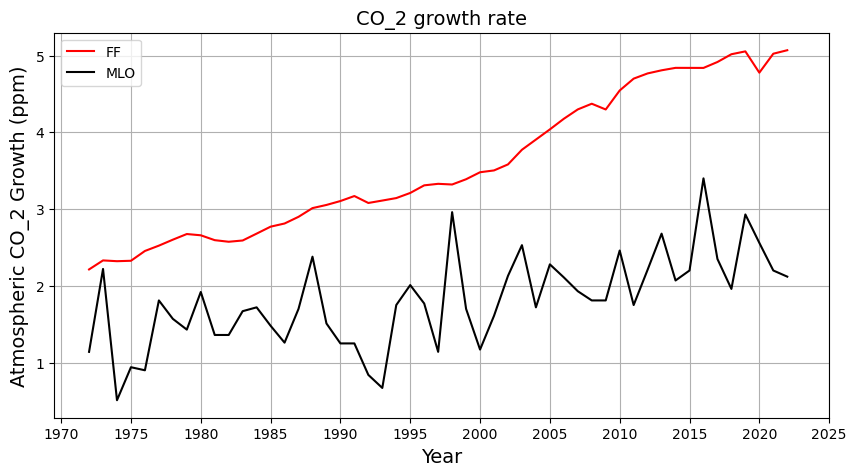

done saving file


In [56]:
fig = plt.figure(figsize=(10,5))
ax=plt.axes()

# plot a zonal mean on an existing figure axis
ax.plot(year_FF[np.where(year_FF>=year_MLOgrowth[0])], FFtotal_ppm[np.where(year_FF>=year_MLOgrowth[0])], color='r', label='FF')
ax.plot(year_MLOgrowth, MLO_growth, color='k',label='MLO')

ax.set_xticks(np.arange(1970,2030,5)) # puts grid lines every 5 years
ax.legend()
plt.grid()

# set a title
plt.title('CO_2 growth rate',fontsize=14,y=1)

# add axis labels
plt.ylabel('Atmospheric CO_2 Growth (ppm)',fontsize=14)
plt.xlabel('Year',fontsize=14)

# show the plot:
plt.show()

# save the plot
fig.savefig('MLOgrowth.png', bbox_inches='tight')
print('done saving file')

# close the plot (so python stops trying to hold on to it in memory; you can
# still look at it at this point, but you're done editing)
plt.close()

## D. Calculate the Airborne Fraction of CO2

dont forget that the years for the two time series cover different time periods

mlo starts later, ffuel might end earlier so we have to find the
times that overlap

In [57]:
overlapyears = np.intersect1d(year_FF,year_MLOgrowth)

Calculate the Airborne Fraction = MLOgrowth/FFtotal

In [58]:
AF= MLO_growth[np.in1d(year_MLOgrowth,overlapyears)]/FFtotal_ppm[np.in1d(year_FF,overlapyears)]
year_AF = overlapyears

--- Plot Global Mean Fossil Fuel Emissions over time

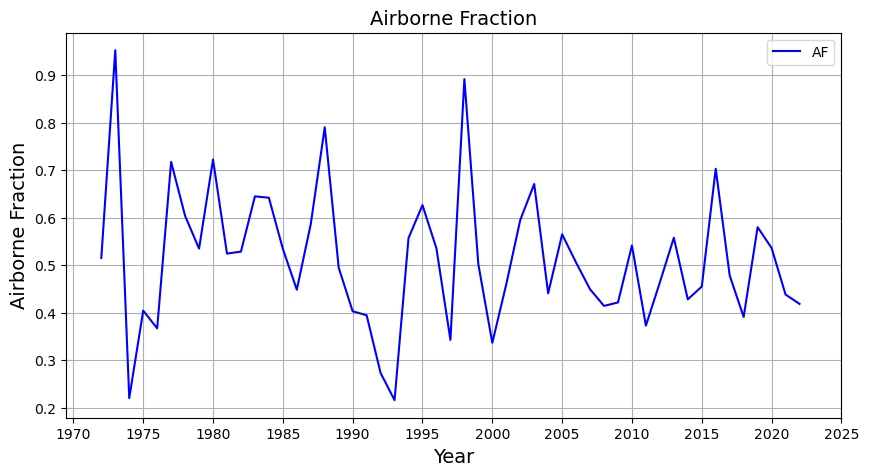

done saving file


In [60]:
fig = plt.figure(figsize=(10,5))
ax=plt.axes()

# plot a zonal mean on an existing figure axis
ax.plot(year_AF, AF, color='b', label='AF')

ax.set_xticks(np.arange(1970,2030,5)) # puts grid lines every 5 years
ax.legend()
plt.grid()

# set a title
plt.title('Airborne Fraction',fontsize=14,y=1)

# add axis labels
plt.ylabel('Airborne Fraction',fontsize=14)
plt.xlabel('Year',fontsize=14)

# show the plot:
plt.show()

# save the plot
fig.savefig('airborne_frac.png', bbox_inches='tight')
print('done saving file')

# close the plot (so python stops trying to hold on to it in memory; you can
# still look at it at this point, but you're done editing)
plt.close()

## E. Do a few of your own calculations
#### To calculate the rate of increase in fossil fuel over the last 20 years use endpoints, in ppm/yr 

In [61]:
print('Fossil Fuel Growth Rate over 20 years (ppm/yr)')
FFgrowthrate_20yrs =(FFtotal_ppm[-1]-FFtotal_ppm[-20])/20
print(FFgrowthrate_20yrs)
      
print('Fossil Fuel Growth Rate over 20 years as a percentage of the year 2000 (%)')
FFgrowthrate_20yrs_percentof2000=100*FFgrowthrate_20yrs/FFtotal_ppm[np.where(year_FF==2000)]
print(FFgrowthrate_20yrs_percentof2000)

Fossil Fuel Growth Rate over 20 years (ppm/yr)
0.06482761618330299
Fossil Fuel Growth Rate over 20 years as a percentage of the year 2000 (%)
[1.86287365]


#### To calculate cumulative FF emissions in ppm

In [62]:
#--For example, to calculate cumulative FF emissions in ppm
FF_cumulative_ppm = np.cumsum(FFtotal_ppm)
FF_cumulative_since1980 = 100*(FF_cumulative_ppm[-1] - FF_cumulative_ppm[np.where(year_FF==1980)])/FF_cumulative_ppm[-1]

print('Cumulative Fossil Fuel emissions since 1980 in % of total emissions')
print(FF_cumulative_since1980)

Cumulative Fossil Fuel emissions since 1980 in % of total emissions
[66.21492446]


#### To take the Standard deviation of the Airborne Fraction

In [63]:
#--For example, To take a standard deviation of the Airborne Fraction
AF_stdev = np.std(AF)

print('Standard Deviation of the Airborne Fraction')
print(AF_stdev)

Standard Deviation of the Airborne Fraction
0.14628051807110368
